<a href="https://colab.research.google.com/github/yozakairi/box/blob/main/study1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pandas import DataFrame

import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
d0= pd.read_csv("/content/drive/MyDrive/normal3.csv", encoding='UTF-8') #説明変数1
d2 = pd.read_csv("/content/drive/MyDrive/data02.csv", encoding='UTF-8') #目的変数1
d3 = pd.read_csv("/content/drive/MyDrive/data03.csv", encoding='UTF-8') #目的変数2
dev1 = pd.read_csv("/content/drive/MyDrive/dev1.csv", encoding='UTF-8')
total= pd.read_csv("/content/drive/MyDrive/normal6.csv", encoding='UTF-8')
to2= pd.read_csv("/content/drive/MyDrive/total02.csv", encoding='UTF-8')
dev2= pd.read_csv("/content/drive/MyDrive/normal10.csv", encoding='UTF-8')



data1=d0.fillna(0) #欠損値に0を代入
d03=d3['result'].map({'OK':1,'NG':0})

In [ ]:
d0['result'].value_counts()

〇    64
×    43
Name: result, dtype: int64

In [ ]:
Result=pd.get_dummies(d0['result'],drop_first=True)
d0_result=pd.concat([d0,Result],axis=1)
d0_result=d0_result.drop(['result'],axis=1)
d0_result.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,deviation,〇
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,53.6,1
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,55.2,1
2,100.0,NaN,100.0,90.0,80.0,100.0,100,100,45,55.0,0
3,80.0,NaN,NaN,90.0,100.0,75.0,70,100,57,52.0,0
4,90.0,NaN,100.0,90.0,100.0,100.0,100,100,50,56.3,0


In [ ]:
d000=d0_result.rename(columns={'〇':'result'})

In [ ]:
d000.head(5)
#result　[1:合格,0:不合格]

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,deviation,result
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,53.6,1
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,55.2,1
2,100.0,NaN,100.0,90.0,80.0,100.0,100,100,45,55.0,0
3,80.0,NaN,NaN,90.0,100.0,75.0,70,100,57,52.0,0
4,90.0,NaN,100.0,90.0,100.0,100.0,100,100,50,56.3,0


In [ ]:
a4=['result']
d_result=d000['result']

In [ ]:
d_result.head(3)

0    1
1    1
2    0
Name: result, dtype: uint8

In [ ]:
#1.1 外れ値を処理せずに欠損値にに0を代入して決定係数を求める
data1.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,result,deviation
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,〇,53.6
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,〇,55.2
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45,×,55.0
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57,×,52.0
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50,×,56.3


In [ ]:
print(d0.sum)
print(d2.sum)
print(dev1.sum)
print(total.sum)
print(to2.sum)

<bound method DataFrame.sum of       NO.1   NO.2   NO.3  NO.4   NO.5  ...  reportA  reportB  exam  result deviation
0    100.0  100.0   75.0  90.0   80.0  ...      100      100    90       〇      53.6
1    100.0  100.0  100.0  90.0   80.0  ...      100      100    90       〇      55.2
2    100.0    NaN  100.0  90.0   80.0  ...      100      100    45       ×      55.0
3     80.0    NaN    NaN  90.0  100.0  ...       70      100    57       ×      52.0
4     90.0    NaN  100.0  90.0  100.0  ...      100      100    50       ×      56.3
..     ...    ...    ...   ...    ...  ...      ...      ...   ...     ...       ...
102  100.0    0.0  100.0  90.0   60.0  ...      100      100    77       〇      52.7
103  100.0   75.0    0.0  70.0   80.0  ...      100      100    75       〇      46.5
104   90.0    0.0  100.0  90.0   50.0  ...      100      100    35       ×      46.3
105   70.0    0.0    0.0   0.0  100.0  ...       70      100    27       ×      53.3
106   90.0  100.0  100.0  90.0   8

In [ ]:
a1=['NO.1','NO.2','NO.3','NO.4','NO.5','NO.6','reportA','reportB']
a2=['NO.1','NO.2','NO.3','NO.4','NO.5','NO.6','reportA','reportB','exam']
a3=['exam']
a4=['result']

In [ ]:
print(d3.head(10))
print(d03.head(10))

  result
0     OK
1     OK
2     NG
3     NG
4     NG
5     OK
6     NG
7     OK
8     OK
9     NG
0    1
1    1
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    0
Name: result, dtype: int64


In [ ]:
d0.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,deviation
count,72.000000,58.000000,89.000000,88.000000,87.000000,91.000000,107.000000,107.000000,107.000000,107.000000
mean,83.472222,79.310345,79.775281,82.272727,79.310345,83.791209,77.289720,83.177570,54.177570,49.214019
std,25.351596,33.158951,26.078009,17.858143,19.216823,24.544072,34.683749,37.582566,29.395101,7.223474
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,24.300000
25%,80.000000,75.000000,75.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,46.300000
50%,90.000000,100.000000,100.000000,90.000000,80.000000,100.000000,100.000000,100.000000,65.000000,51.600000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,54.450000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,58.300000


In [ ]:
data2=data1[a1]

data2.head(10)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100
5,0.0,50.0,75.0,70.0,0.0,100.0,100,100
6,80.0,0.0,0.0,0.0,10.0,100.0,100,100
7,0.0,100.0,100.0,0.0,0.0,100.0,100,100
8,100.0,100.0,75.0,80.0,90.0,100.0,100,100
9,0.0,0.0,0.0,100.0,0.0,25.0,100,0


In [ ]:
data1

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,result,deviation
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,〇,53.6
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,〇,55.2
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45,×,55.0
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57,×,52.0
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50,×,56.3
...,...,...,...,...,...,...,...,...,...,...,...
102,100.0,0.0,100.0,90.0,60.0,100.0,100,100,77,〇,52.7
103,100.0,75.0,0.0,70.0,80.0,50.0,100,100,75,〇,46.5
104,90.0,0.0,100.0,90.0,50.0,50.0,100,100,35,×,46.3
105,70.0,0.0,0.0,0.0,100.0,100.0,70,100,27,×,53.3


In [ ]:
data3=data1[a2]

data3.head(10)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50
5,0.0,50.0,75.0,70.0,0.0,100.0,100,100,67
6,80.0,0.0,0.0,0.0,10.0,100.0,100,100,0
7,0.0,100.0,100.0,0.0,0.0,100.0,100,100,65
8,100.0,100.0,75.0,80.0,90.0,100.0,100,100,75
9,0.0,0.0,0.0,100.0,0.0,25.0,100,0,0


    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100    90  745.0
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100    90  770.0
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100    45  670.0


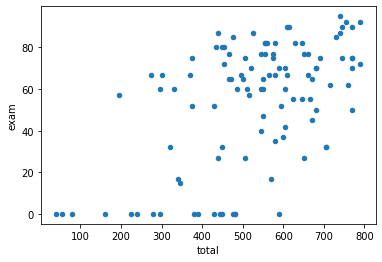

In [ ]:
dx1=data3.head(107)
dx1["total"]=dx1["NO.1"]+dx1["NO.2"]+dx1["NO.3"]+dx1["NO.4"]+dx1["NO.5"]+dx1["NO.6"]+dx1["reportA"]+dx1["reportB"]
print(dx1.head(3))
dx1.plot(kind='scatter',x='total',y='exam')

In [ ]:
#外れ値を処理しないまま決定係数を求める

#d1,d2を説明変数、目的変数に分割
model1=LinearRegression()
i=0 
stotal1=0
for i in range(10):
    xtrain1,xtest1,ytrain1,ytest1=train_test_split(data2,d2,test_size=0.2,random_state=i)
    model1.fit(xtrain1,ytrain1)
    sval1=model1.score(xtest1, ytest1)
    stotal1=stotal1+sval1
    saverage1=stotal1/10
print(saverage1)

0.4133625394587986


In [ ]:
ave1=(0.08186732604835645+0.47159038823051136+0.48895441487749436+0.3431472061809703+0.6248517272614358+0.2975312585567548+0.42666259495812253+0.5630299658025235+0.7636820491291796+0.07230846354263709)/10
print(ave1)

0.4133625394587986


In [ ]:
#ave1=/10
#print(ave1)

In [ ]:
print(data2.head(3))
print(d_result.head(3))

    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100
0    1
1    1
2    0
Name: result, dtype: uint8


In [ ]:
#ロジスティック回帰
#正解率

logi1=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal2=0
stotal3=0
for i in range(10):
    xtrain01,xtest01,ytrain01,ytest01=train_test_split(data2,d_result,test_size=0.2,random_state=i)
    logi1.fit(xtrain01,ytrain01)

    sval2=logi1.score(xtrain01,ytrain01)
    sval3=logi1.score(xtest01,ytest01)
    
    stotal2=stotal2+sval2
    stotal3=stotal3+sval3

    saverage2=stotal2/10
    saverage3=stotal3/10
print(saverage2,saverage3)


0.7223529411764706 0.6909090909090908


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal4=0
for i in range(10):
    xtrain01,xtest01,ytrain01,ytest01=train_test_split(data2,d_result,test_size=0.2,random_state=i)
    ypred1 = logi1.predict(xtest01)
    sval4=accuracy_score(ytest01,ypred1)
    stotal4=stotal4+sval4
    saverage4=stotal4/10
print(saverage4)

0.6863636363636363


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest01,y_pred=ypred1))
i01=0
i10=0
for i in range(len(ytest01)):
  print(ytest01.iloc[i],ypred1[i])
  if ytest01.iloc[i]==0 and ypred1[i]==1:
    i01=+i01+1 
  if ytest01.iloc[i]==1 and ypred1[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest1)}")

accuracy= 0.5454545454545454
1 0
1 1
0 1
1 1
1 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 0
0 1
1 1
1 1
0 1
0 1
0 1
1 1
i01=7,i10=4,total=22


In [ ]:
#1.2 相関係数で絞り込みver
data3_cor=data3.corr()['exam']
data3_cor

NO.1       0.122533
NO.2       0.224618
NO.3       0.181748
NO.4       0.070936
NO.5       0.309327
NO.6       0.288568
reportA    0.607673
reportB    0.631237
exam       1.000000
Name: exam, dtype: float64

In [ ]:
abs_data3=data3_cor.map(abs)
abs_data3.sort_values(ascending=False)

exam       1.000000
reportB    0.631237
reportA    0.607673
NO.5       0.309327
NO.6       0.288568
NO.2       0.224618
NO.3       0.181748
NO.1       0.122533
NO.4       0.070936
Name: exam, dtype: float64

In [ ]:
col1=['reportB','reportA','NO.5','NO.6']
data4=data3[col1]
data5=data3[a3]

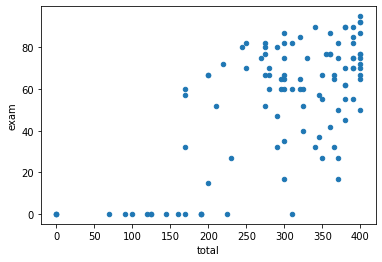

In [ ]:
dx2=data3.head(108)
dx2["total"]=dx2["NO.5"]+dx2["NO.6"]+dx2["reportA"]+dx2["reportB"]
dx2.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data4,data5を説明変数、目的変数に分割
model2=LinearRegression()
i=0 
stotal5=0
for i in range(10):
    xtrain2,xtest2,ytrain2,ytest2=train_test_split(data4,data5,test_size=0.2,random_state=i)
    model2.fit(xtrain2,ytrain2)
    sval5=model2.score(xtest2, ytest2)
    stotal5=stotal5+sval5
    saverage5=stotal5/10
print(saverage5)

0.46143767677093184


In [ ]:
#ロジスティック回帰
#正解率

logi2=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal6=0
stotal7=0
for i in range(10):
    xtrain02,xtest02,ytrain02,ytest02=train_test_split(data4,d_result,test_size=0.2,random_state=i)
    logi2.fit(xtrain02,ytrain02)

    sval6=logi2.score(xtrain02,ytrain02)
    sval7=logi2.score(xtest02,ytest02)
    
    stotal6=stotal6+sval6
    stotal7=stotal7+sval7

    saverage6=stotal6/10
    saverage7=stotal7/10
print(saverage6,saverage7)


0.7070588235294119 0.7136363636363636


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal8=0
for i in range(10):
    xtrain02,xtest02,ytrain02,ytest02=train_test_split(data4,d_result,test_size=0.2,random_state=i)
    ypred2 = logi2.predict(xtest02)
    sval8=accuracy_score(ytest02,ypred2)
    stotal8=stotal8+sval8
    saverage8=stotal8/10
print(saverage8)

0.75


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest02,y_pred=ypred2))
i01=0
i10=0
for i in range(len(ytest02)):
  print(ytest02.iloc[i],ypred2[i])
  if ytest02.iloc[i]==0 and ypred2[i]==1:
    i01=+i01+1 
  if ytest02.iloc[i]==1 and ypred2[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest2)}")

accuracy= 0.7272727272727273
1 1
1 1
0 0
1 1
1 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
0 1
1 1
i01=5,i10=1,total=22


In [ ]:
#2.1 欠損値に0を代入して試験が0点の人を排除して決定係数を求める

data6=data3[data3['exam']!=0].fillna(0)
data6

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50
...,...,...,...,...,...,...,...,...,...
102,100.0,0.0,100.0,90.0,60.0,100.0,100,100,77
103,100.0,75.0,0.0,70.0,80.0,50.0,100,100,75
104,90.0,0.0,100.0,90.0,50.0,50.0,100,100,35
105,70.0,0.0,0.0,0.0,100.0,100.0,70,100,27


In [ ]:
d001=d000[d000['exam']!=0].fillna(0)
d002=d001[a4]
d002.sum

<bound method DataFrame.sum of      result
0         1
1         1
2         0
3         0
4         0
..      ...
102       1
103       1
104       0
105       0
106       1

[90 rows x 1 columns]>

In [ ]:
data7=data6[a2]
data7.head(7)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50
5,0.0,50.0,75.0,70.0,0.0,100.0,100,100,67
7,0.0,100.0,100.0,0.0,0.0,100.0,100,100,65


In [ ]:
data8=data7[a1]
data9=data7[a3]


    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100    90  745.0
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100    90  770.0
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100    45  670.0


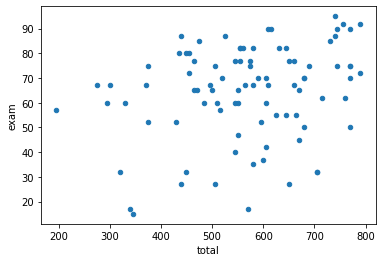

In [ ]:
dx3=data7.head(107)
dx3["total"]=dx3["NO.1"]+dx3["NO.2"]+dx3["NO.3"]+dx3["NO.4"]+dx3["NO.5"]+dx3["NO.6"]+dx3["reportA"]+dx3["reportB"]
print(dx3.head(3))
dx3.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data8,data9を説明変数、目的変数に分割
model3=LinearRegression()
i=0 
stotal9=0
for i in range(10):
    xtrain3,xtest3,ytrain3,ytest3=train_test_split(data8,data9,test_size=0.2,random_state=i)
    model3.fit(xtrain3,ytrain3)
    sval9=model3.score(xtest3, ytest3)
    stotal9=stotal9+sval9
    saverage9=stotal9/10
print(saverage9)

-0.26359953243218914


In [ ]:
#ロジスティック回帰
#正解率

logi3=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal10=0
stotal11=0
for i in range(10):
    xtrain03,xtest03,ytrain03,ytest03=train_test_split(data8,d002,test_size=0.2,random_state=i)
    logi3.fit(xtrain03,ytrain03)

    sval10=logi3.score(xtrain03,ytrain03)
    sval11=logi3.score(xtest03,ytest03)
    
    stotal10=stotal10+sval10
    stotal11=stotal11+sval11

    saverage10=stotal10/10
    saverage11=stotal11/10
print(saverage10,saverage11)


0.7083333333333334 0.65


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal12=0
for i in range(10):
    xtrain03,xtest03,ytrain03,ytest03=train_test_split(data8,d002,test_size=0.2,random_state=i)
    ypred3= logi3.predict(xtest03)
    sval12=accuracy_score(ytest03,ypred3)
    stotal12=stotal12+sval12
    saverage12=stotal12/10
print(saverage12)

0.65


In [ ]:
#2.2 相関係数で絞り込みver
data6_cor=data6.corr()['exam']
data6_cor
abs_data6=data6_cor.map(abs)
abs_data6.sort_values(ascending=False)

exam       1.000000
NO.1       0.219270
NO.6       0.175995
NO.5       0.144751
reportA    0.138493
NO.2       0.122279
NO.4       0.089860
reportB    0.061632
NO.3       0.061064
Name: exam, dtype: float64

In [ ]:
col2=['NO.1','NO.6','NO.5','reportA']
data10=data6[col2]
data11=data6[a3]

    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100    90  380.0
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100    90  380.0
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100    45  380.0


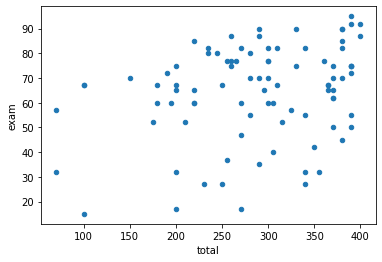

In [ ]:
dx4=data7.head(108)
dx4["total"]=dx4["NO.1"]+dx4["NO.5"]+dx4["NO.6"]+dx4["reportA"]
print(dx4.head(3))
dx4.plot(kind='scatter',x='total',y='exam')

In [ ]:
print(data10.sum)
print(data11.sum)

<bound method DataFrame.sum of       NO.1   NO.6   NO.5  reportA
0    100.0  100.0   80.0      100
1    100.0  100.0   80.0      100
2    100.0  100.0   80.0      100
3     80.0   75.0  100.0       70
4     90.0  100.0  100.0      100
..     ...    ...    ...      ...
102  100.0  100.0   60.0      100
103  100.0   50.0   80.0      100
104   90.0   50.0   50.0      100
105   70.0  100.0  100.0       70
106   90.0  100.0   80.0      100

[90 rows x 4 columns]>
<bound method DataFrame.sum of      exam
0      90
1      90
2      45
3      57
4      50
..    ...
102    77
103    75
104    35
105    27
106    62

[90 rows x 1 columns]>


In [ ]:
#data10,data11を説明変数、目的変数に分割
model4=LinearRegression()
i=0 
stotal13=0
for i in range(10):
    xtrain4,xtest4,ytrain4,ytest4=train_test_split(data10,data11,test_size=0.2,random_state=i)
    model4.fit(xtrain4,ytrain4)
    sval13=model4.score(xtest4, ytest4)
    stotal13=stotal13+sval13
    saverage13=stotal13/10
print(saverage13)

-0.07780067847891738


In [ ]:
#ロジスティック回帰
#正解率

logi4=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal14=0
stotal15=0
for i in range(10):
    xtrain04,xtest04,ytrain04,ytest04=train_test_split(data10,d002,test_size=0.2,random_state=i)
    logi4.fit(xtrain04,ytrain04)

    sval14=logi4.score(xtrain04,ytrain04)
    sval15=logi4.score(xtest04,ytest04)
    
    stotal14=stotal14+sval14
    stotal15=stotal15+sval15

    saverage14=stotal14/10
    saverage15=stotal15/10
print(saverage14,saverage15)


0.6986111111111112 0.6666666666666667


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal16=0
for i in range(10):
    xtrain04,xtest04,ytrain04,ytest04=train_test_split(data10,d002,test_size=0.2,random_state=i)
    ypred4 = logi4.predict(xtest04)
    sval16=accuracy_score(ytest04,ypred4)
    stotal16=stotal16+sval16
    saverage16=stotal16/10
print(saverage16)

0.6777777777777778


In [ ]:
#3.1 欠損値に平均を代入してexamがが0の外れ値を除外して決定係数を求める

In [ ]:
d0.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,deviation
count,72.000000,58.000000,89.000000,88.000000,87.000000,91.000000,107.000000,107.000000,107.000000,107.000000
mean,83.472222,79.310345,79.775281,82.272727,79.310345,83.791209,77.289720,83.177570,54.177570,49.214019
std,25.351596,33.158951,26.078009,17.858143,19.216823,24.544072,34.683749,37.582566,29.395101,7.223474
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,24.300000
25%,80.000000,75.000000,75.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,46.300000
50%,90.000000,100.000000,100.000000,90.000000,80.000000,100.000000,100.000000,100.000000,65.000000,51.600000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,54.450000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,58.300000


In [ ]:
d0_mean= d0.mean()#各列の平均
data12=d0[d0['exam']!=0].fillna(d0_mean)
data12.sum

<bound method DataFrame.sum of       NO.1        NO.2        NO.3  NO.4  ...  reportB  exam  result  deviation
0    100.0  100.000000   75.000000  90.0  ...      100    90       〇       53.6
1    100.0  100.000000  100.000000  90.0  ...      100    90       〇       55.2
2    100.0   79.310345  100.000000  90.0  ...      100    45       ×       55.0
3     80.0   79.310345   79.775281  90.0  ...      100    57       ×       52.0
4     90.0   79.310345  100.000000  90.0  ...      100    50       ×       56.3
..     ...         ...         ...   ...  ...      ...   ...     ...        ...
102  100.0    0.000000  100.000000  90.0  ...      100    77       〇       52.7
103  100.0   75.000000    0.000000  70.0  ...      100    75       〇       46.5
104   90.0    0.000000  100.000000  90.0  ...      100    35       ×       46.3
105   70.0    0.000000    0.000000   0.0  ...      100    27       ×       53.3
106   90.0  100.000000  100.000000  90.0  ...      100    62       〇       54.5

[90 rows

In [ ]:
dt1=data12[a2]
dt1

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.000000,75.000000,90.0,80.0,100.0,100,100,90
1,100.0,100.000000,100.000000,90.0,80.0,100.0,100,100,90
2,100.0,79.310345,100.000000,90.0,80.0,100.0,100,100,45
3,80.0,79.310345,79.775281,90.0,100.0,75.0,70,100,57
4,90.0,79.310345,100.000000,90.0,100.0,100.0,100,100,50
...,...,...,...,...,...,...,...,...,...
102,100.0,0.000000,100.000000,90.0,60.0,100.0,100,100,77
103,100.0,75.000000,0.000000,70.0,80.0,50.0,100,100,75
104,90.0,0.000000,100.000000,90.0,50.0,50.0,100,100,35
105,70.0,0.000000,0.000000,0.0,100.0,100.0,70,100,27


In [ ]:
data13=data12[a1]
data14=data12[a3]

    NO.1        NO.2   NO.3  NO.4  ...  reportA  reportB  exam       total
0  100.0  100.000000   75.0  90.0  ...      100      100    90  745.000000
1  100.0  100.000000  100.0  90.0  ...      100      100    90  770.000000
2  100.0   79.310345  100.0  90.0  ...      100      100    45  749.310345

[3 rows x 10 columns]


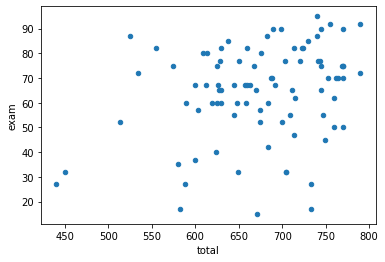

In [ ]:
dx5=dt1.head(107)
dx5["total"]=dx5["NO.1"]+dx5["NO.2"]+dx5["NO.3"]+dx5["NO.4"]+dx5["NO.5"]+dx5["NO.6"]+dx5["reportA"]+dx5["reportB"]
print(dx5.head(3))
dx5.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data13,data14を説明変数、目的変数に分割
model5=LinearRegression()
i=0 
stotal17=0
for i in range(10):
    xtrain5,xtest5,ytrain5,ytest5=train_test_split(data13,data14,test_size=0.2,random_state=i)
    model5.fit(xtrain5,ytrain5)
    sval17=model5.score(xtest5, ytest5)
    stotal17=stotal17+sval17
    saverage17=stotal17/10
print(saverage17)

-0.3026168273476115


In [ ]:
#ロジスティック回帰
#正解率

logi5=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal18=0
stotal19=0
for i in range(10):
    xtrain05,xtest05,ytrain05,ytest05=train_test_split(data13,d002,test_size=0.2,random_state=i)
    logi5.fit(xtrain05,ytrain05)

    sval18=logi5.score(xtrain05,ytrain05)
    sval19=logi5.score(xtest05,ytest05)
    
    stotal18=stotal18+sval18
    stotal19=stotal19+sval19

    saverage18=stotal18/10
    saverage19=stotal19/10
print(saverage18,saverage19)
    

0.7208333333333334 0.6499999999999999


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal20=0
for i in range(10):
    xtrain05,xtest05,ytrain05,ytest05=train_test_split(data13,d002,test_size=0.2,random_state=i)
    ypred5 = logi5.predict(xtest05)
    sval20=accuracy_score(ytest05,ypred5)
    stotal20=stotal20+sval20
    saverage20=stotal20/10
print(saverage20)

0.7333333333333334


In [ ]:
data15=data12[a2]

In [ ]:
#3.2 相関係数で絞り込みver
data15_cor=data15.corr()['exam']
abs_data15=data15_cor.map(abs)
abs_data15.sort_values(ascending=False)

exam       1.000000
NO.1       0.226207
NO.5       0.184362
NO.4       0.173814
reportA    0.138493
NO.2       0.110602
NO.6       0.086602
NO.3       0.075417
reportB    0.061632
Name: exam, dtype: float64

In [ ]:
col3=['NO.1','NO.5','NO.4','reportA']
data16=data15[col3]
data17=data15[a3]

    NO.1        NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.000000   75.0  90.0  80.0  100.0      100      100    90  370.0
1  100.0  100.000000  100.0  90.0  80.0  100.0      100      100    90  370.0
2  100.0   79.310345  100.0  90.0  80.0  100.0      100      100    45  370.0


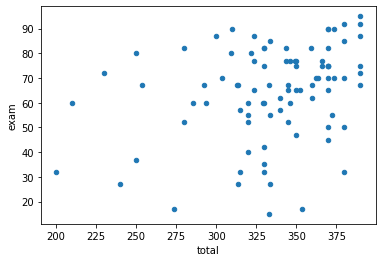

In [ ]:
dx6=dt1.head(107)
dx6["total"]=dx6["NO.1"]+dx6["NO.4"]+dx6["NO.5"]+dx6["reportA"]
print(dx6.head(3))
dx6.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data16,data17を説明変数、目的変数に分割
model6=LinearRegression()
i=0 
stotal21=0
for i in range(10):
    xtrain6,xtest6,ytrain6,ytest6=train_test_split(data16,data17,test_size=0.2,random_state=i)
    model6.fit(xtrain6,ytrain6)
    sval21=model6.score(xtest6, ytest6)
    stotal21=stotal21+sval21
    saverage21=stotal21/10
print(saverage21)

-0.16604687293979936


In [ ]:
#ロジスティック回帰
#正解率

logi6=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal22=0
stotal23=0
for i in range(10):
    xtrain06,xtest06,ytrain06,ytest06=train_test_split(data16,d002,test_size=0.2,random_state=i)
    logi6.fit(xtrain06,ytrain06)

    sval22=logi6.score(xtrain06,ytrain06)
    sval23=logi6.score(xtest06,ytest06)
    
    stotal22=stotal22+sval22
    stotal23=stotal23+sval23

    saverage22=stotal22/10
    saverage23=stotal23/10
print(saverage22,saverage23)

0.7208333333333334 0.6444444444444445


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal24=0
for i in range(10):
    xtrain06,xtest06,ytrain06,ytest06=train_test_split(data16,d002,test_size=0.2,random_state=i)
    ypred6 = logi6.predict(xtest06)
    sval24=accuracy_score(ytest06,ypred6)
    stotal24=stotal24+sval24
    saverage24=stotal24/10
print(saverage24)

0.688888888888889


In [ ]:
#4.1 欠損値に偏差値から求めた点数を代入してexamがが0の外れ値を除外して決定係数を求める. 訂正

In [ ]:
d0.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,deviation
count,72.000000,58.000000,89.000000,88.000000,87.000000,91.000000,107.000000,107.000000,107.000000,107.000000
mean,83.472222,79.310345,79.775281,82.272727,79.310345,83.791209,77.289720,83.177570,54.177570,49.214019
std,25.351596,33.158951,26.078009,17.858143,19.216823,24.544072,34.683749,37.582566,29.395101,7.223474
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,24.300000
25%,80.000000,75.000000,75.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,46.300000
50%,90.000000,100.000000,100.000000,90.000000,80.000000,100.000000,100.000000,100.000000,65.000000,51.600000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,54.450000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,58.300000


In [ ]:
dev2.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,81.308411,74.345794,77.514019,81.121495,77.140187,81.757009,77.289720,83.177570,54.177570,633.654206
std,24.287745,30.939412,25.776018,17.808049,19.582650,25.062880,34.683749,37.582566,29.395101,129.589344
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,124.000000
25%,77.500000,59.000000,68.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,579.500000
50%,90.000000,86.000000,77.000000,88.000000,80.000000,100.000000,100.000000,100.000000,65.000000,653.000000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,735.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
data18=dev2[dev2['exam']!=0]
data18.sum

<bound method DataFrame.sum of      NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0     100   100    75    90    80   100      100      100    90    745
1     100   100   100    90    80   100      100      100    90    770
2     100    96   100    90    80   100      100      100    45    766
3      80    86    85    90   100    75       70      100    57    686
4      90   100   100    90   100   100      100      100    50    780
..    ...   ...   ...   ...   ...   ...      ...      ...   ...    ...
102   100     0   100    90    60   100      100      100    77    650
103   100    75     0    70    80    50      100      100    75    575
104    90     0   100    90    50    50      100      100    35    580
105    70     0     0     0   100   100       70      100    27    440
106    90   100   100    90    80   100      100      100    62    760

[90 rows x 10 columns]>

In [ ]:
data019=data18[a2]
data019

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100,100,75,90,80,100,100,100,90
1,100,100,100,90,80,100,100,100,90
2,100,96,100,90,80,100,100,100,45
3,80,86,85,90,100,75,70,100,57
4,90,100,100,90,100,100,100,100,50
...,...,...,...,...,...,...,...,...,...
102,100,0,100,90,60,100,100,100,77
103,100,75,0,70,80,50,100,100,75
104,90,0,100,90,50,50,100,100,35
105,70,0,0,0,100,100,70,100,27


   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    745
1   100   100   100    90    80   100      100      100    90    770
2   100    96   100    90    80   100      100      100    45    766


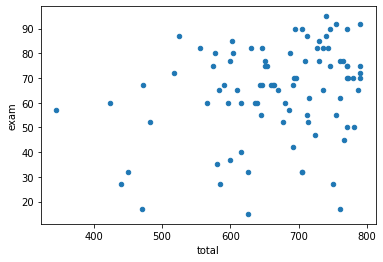

In [ ]:
dx7=data019.head(107)
dx7["total"]=dx7["NO.1"]+dx7["NO.2"]+dx7["NO.3"]+dx7["NO.4"]+dx7["NO.5"]+dx7["NO.6"]+dx7["reportA"]+dx7["reportB"]
print(dx7.head(3))
dx7.plot(kind='scatter',x='total',y='exam')

In [ ]:
data19=data18[a1]
data20=data18[a3]

In [ ]:
#外れ値を処理しないまま決定係数を求める

#d1,d2を説明変数、目的変数に分割
model7=LinearRegression()
i=0 
stotal25=0
for i in range(10):
    xtrain7,xtest7,ytrain7,ytest7=train_test_split(data19,data20,test_size=0.2,random_state=i)
    model7.fit(xtrain7,ytrain7)
    sval25=model7.score(xtest7, ytest7)
    stotal25=stotal25+sval25
    saverage25=stotal25/10
print(saverage25)

-0.35125374618305194


In [ ]:
#ロジスティック回帰
#正解率

logi7=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal025=0
stotal26=0
for i in range(10):
    xtrain07,xtest07,ytrain07,ytest07=train_test_split(data19,d002,test_size=0.2,random_state=i)
    logi7.fit(xtrain07,ytrain07)

    sval025=logi7.score(xtrain07,ytrain07)
    sval26=logi7.score(xtest07,ytest07)
    
    stotal025=stotal025+sval025
    stotal26=stotal26+sval26

    saverage26=stotal025/10
    saverage27=stotal26/10
print(saverage26,saverage27)


0.7166666666666667 0.6277777777777778


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal27=0
for i in range(10):
    xtrain07,xtest07,ytrain07,ytest07=train_test_split(data19,d002,test_size=0.2,random_state=i)
    ypred7 = logi7.predict(xtest07)
    sval27=accuracy_score(ytest07,ypred7)
    stotal27=stotal27+sval27
    saverage28=stotal27/10
print(saverage28)

0.6611111111111111


In [ ]:
#4.2 相関係数で絞り込みver

In [ ]:
data019_cor=data019.corr()['exam']
abs_data019=data019_cor.map(abs)
abs_data019.sort_values(ascending=False)

exam       1.000000
NO.1       0.262432
NO.5       0.194064
NO.4       0.193587
NO.2       0.151603
reportA    0.138493
NO.6       0.120857
NO.3       0.106625
reportB    0.061632
Name: exam, dtype: float64

In [ ]:
col4=['NO.1','NO.5','NO.4','NO.2']
data21=data18[col4]
data22=data18[a3]

   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    370
1   100   100   100    90    80   100      100      100    90    370
2   100    96   100    90    80   100      100      100    45    366


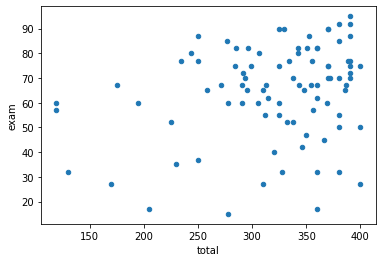

In [ ]:
dx8=data019.head(107)
dx8["total"]=dx8["NO.1"]+dx8["NO.2"]+dx8["NO.4"]+dx8["NO.5"]
print(dx8.head(3))
dx8.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data21,data22を説明変数、目的変数に分割
model8=LinearRegression()
i=0 
stotal28=0
for i in range(10):
    xtrain8,xtest8,ytrain8,ytest8=train_test_split(data21,data22,test_size=0.2,random_state=i)
    model8.fit(xtrain8,ytrain8)
    sval28=model8.score(xtest8, ytest8)
    stotal28=stotal28+sval28
    saverage29=stotal28/10
print(saverage29)

-0.22070766925466598


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain8,xtest8,ytrain8,ytest8=train_test_split(data21,data22,test_size=0.2,random_state=i)
    model8.fit(xtrain8,ytrain8)
    print(model8.coef_)
    print(model8.intercept_) #切片

[[ 0.18005967  0.17209898  0.16764982 -0.01622411]]
[23.28093261]
[[ 0.24104995 -0.02452299  0.20819394 -0.00975745]]
[30.70159068]
[[ 0.07945356  0.11607027  0.30105493 -0.11669454]]
[31.73902972]
[[ 0.30525402  0.2572684  -0.22494819  0.00726205]]
[35.41565335]
[[ 0.12038527 -0.06181412  0.15193591  0.10154782]]
[39.3526498]
[[ 0.13421773  0.12265436  0.22832309 -0.02799017]]
[26.01714911]
[[0.14231456 0.05548888 0.10687767 0.02001492]]
[37.19587246]
[[ 0.27439597 -0.02400573  0.13524174 -0.06669423]]
[38.31605183]
[[ 0.23025489  0.25365684 -0.04198608 -0.08344491]]
[35.44551661]
[[ 0.17168809  0.1964845   0.10822979 -0.02158708]]
[25.52058469]


In [ ]:
#ロジスティック回帰
#正解率

logi8=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal29=0
stotal30=0
for i in range(10):
    xtrain08,xtest08,ytrain08,ytest08=train_test_split(data21,d002,test_size=0.2,random_state=i)
    logi8.fit(xtrain08,ytrain08)

    sval29=logi8.score(xtrain08,ytrain08)
    sval30=logi8.score(xtest08,ytest08)
    
    stotal29=stotal29+sval29
    stotal30=stotal30+sval30

    saverage30=stotal29/10
    saverage31=stotal30/10
print(saverage30,saverage31)


0.7291666666666667 0.6500000000000001


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal31=0
for i in range(10):
    xtrain08,xtest08,ytrain08,ytest08=train_test_split(data21,d002,test_size=0.2,random_state=i)
    ypred8 = logi8.predict(xtest08)
    sval31=accuracy_score(ytest08,ypred8)
    stotal31=stotal31+sval31
    saverage32=stotal31/10
print(saverage32)

0.6944444444444444


In [ ]:
#5.1 外れ値を処理せずに欠損値に平均を代入して決定係数を求める

In [ ]:
d0.sum

<bound method DataFrame.sum of       NO.1   NO.2   NO.3  NO.4   NO.5  ...  reportA  reportB  exam  result deviation
0    100.0  100.0   75.0  90.0   80.0  ...      100      100    90       〇      53.6
1    100.0  100.0  100.0  90.0   80.0  ...      100      100    90       〇      55.2
2    100.0    NaN  100.0  90.0   80.0  ...      100      100    45       ×      55.0
3     80.0    NaN    NaN  90.0  100.0  ...       70      100    57       ×      52.0
4     90.0    NaN  100.0  90.0  100.0  ...      100      100    50       ×      56.3
..     ...    ...    ...   ...    ...  ...      ...      ...   ...     ...       ...
102  100.0    0.0  100.0  90.0   60.0  ...      100      100    77       〇      52.7
103  100.0   75.0    0.0  70.0   80.0  ...      100      100    75       〇      46.5
104   90.0    0.0  100.0  90.0   50.0  ...      100      100    35       ×      46.3
105   70.0    0.0    0.0   0.0  100.0  ...       70      100    27       ×      53.3
106   90.0  100.0  100.0  90.0   8

In [ ]:
data23=d0.fillna(d0_mean)
data23.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,result,deviation
0,100.0,100.000000,75.000000,90.0,80.0,100.0,100,100,90,〇,53.6
1,100.0,100.000000,100.000000,90.0,80.0,100.0,100,100,90,〇,55.2
2,100.0,79.310345,100.000000,90.0,80.0,100.0,100,100,45,×,55.0
3,80.0,79.310345,79.775281,90.0,100.0,75.0,70,100,57,×,52.0
4,90.0,79.310345,100.000000,90.0,100.0,100.0,100,100,50,×,56.3


In [ ]:
data24=data23[a1]
data25=data23[a3]

In [ ]:
dt2=data23[a2]

    NO.1        NO.2   NO.3  NO.4  ...  reportA  reportB  exam       total
0  100.0  100.000000   75.0  90.0  ...      100      100    90  745.000000
1  100.0  100.000000  100.0  90.0  ...      100      100    90  770.000000
2  100.0   79.310345  100.0  90.0  ...      100      100    45  749.310345

[3 rows x 10 columns]


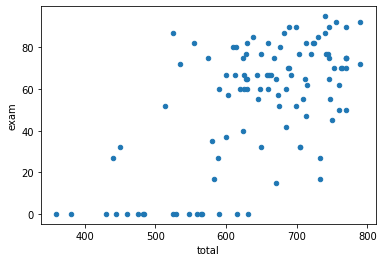

In [ ]:
dx9=dt2.head(107)
dx9["total"]=dx9["NO.1"]+dx9["NO.2"]+dx9["NO.3"]+dx9["NO.4"]+dx9["NO.5"]+dx9["NO.6"]+dx9["reportA"]+dx9["reportB"]
print(dx9.head(3))
dx9.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data24,data25を説明変数、目的変数に分割
model9=LinearRegression()
i=0 
stotal32=0
for i in range(10):
    xtrain9,xtest9,ytrain9,ytest9=train_test_split(data24,data25,test_size=0.2,random_state=i)
    model9.fit(xtrain9,ytrain9)
    sval32=model9.score(xtest9, ytest9)
    stotal32=stotal32+sval32
    saverage33=stotal32/10
print(saverage33)

0.36098132617132006


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain9,xtest9,ytrain9,ytest9=train_test_split(data24,data25,test_size=0.2,random_state=i)
    model9.fit(xtrain9,ytrain9)
    print(model9.coef_)
    print(model9.intercept_) #切片

[[0.14812552 0.12852619 0.1291483  0.03522071 0.28671223 0.08463632
  0.2275493  0.37529122]]
[-58.74223224]
[[0.13599724 0.11559705 0.07274457 0.03085858 0.35051528 0.1719691
  0.31164433 0.26285559]]
[-64.16847291]
[[ 0.14855173  0.04681459  0.11138342 -0.0089968   0.1940124   0.10780619
   0.21519838  0.35758529]]
[-40.34649389]
[[ 0.16127833 -0.02434973  0.02400614  0.07461721  0.07318829  0.23547375
   0.41703161  0.19439868]]
[-40.10038545]
[[ 0.1682507   0.07857088  0.15017205 -0.0715274   0.20533148  0.14980088
   0.23839689  0.33691756]]
[-47.43719304]
[[0.15185968 0.02922638 0.04679771 0.02860314 0.02360262 0.2590564
  0.23599917 0.34741555]]
[-40.02726814]
[[ 0.14887873  0.05121208  0.01995835 -0.0810013   0.23512613  0.13092738
   0.15907899  0.4035545 ]]
[-32.99143305]
[[0.15790151 0.00043763 0.09493968 0.02819201 0.21942982 0.12474907
  0.17976671 0.40076402]]
[-44.2133927]
[[ 0.21421071  0.08015556  0.06345645 -0.0245627   0.27145161  0.09129237
   0.25412175  0.32753534

In [ ]:
#ロジスティック回帰
#正解率

logi9=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal33=0
stotal34=0
for i in range(10):
    xtrain09,xtest09,ytrain09,ytest09=train_test_split(data24,d_result,test_size=0.2,random_state=i)
    logi9.fit(xtrain09,ytrain09)

    sval33=logi1.score(xtrain09,ytrain09)
    sval34=logi9.score(xtest09,ytest09)
    
    stotal33=stotal33+sval33
    stotal34=stotal34+sval34

    saverage34=stotal33/10
    saverage35=stotal34/10
print(saverage34,saverage35)


0.6941176470588236 0.7045454545454546


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal35=0
for i in range(10):
    xtrain09,xtest09,ytrain09,ytest09=train_test_split(data24,d_result,test_size=0.2,random_state=i)
    ypred9 = logi9.predict(xtest09)
    sval35=accuracy_score(ytest09,ypred9)
    stotal35=stotal35+sval35
    saverage36=stotal35/10
print(saverage36)

0.7090909090909092


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest09,y_pred=ypred9))
i01=0
i10=0
for i in range(len(ytest09)):
  print(ytest09.iloc[i],ypred9[i])
  if ytest09.iloc[i]==0 and ypred9[i]==1:
    i01=+i01+1 
  if ytest09.iloc[i]==1 and ypred9[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest9)}")

accuracy= 0.5909090909090909
1 0
1 1
0 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
i01=7,i10=4,total=22


In [ ]:
#5.2 相関係数で絞り込みver

In [ ]:
data26=data23[a2]

In [ ]:
data26.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.000000,75.000000,90.0,80.0,100.0,100,100,90
1,100.0,100.000000,100.000000,90.0,80.0,100.0,100,100,90
2,100.0,79.310345,100.000000,90.0,80.0,100.0,100,100,45
3,80.0,79.310345,79.775281,90.0,100.0,75.0,70,100,57
4,90.0,79.310345,100.000000,90.0,100.0,100.0,100,100,50


In [ ]:
data26_cor=data26.corr()['exam']

abs_data26=data26_cor.map(abs)
abs_data26.sort_values(ascending=False)

exam       1.000000
reportB    0.631237
reportA    0.607673
NO.1       0.243047
NO.5       0.220003
NO.6       0.186082
NO.3       0.065049
NO.4       0.040756
NO.2       0.015839
Name: exam, dtype: float64

In [ ]:
col5=['reportB','reportA','NO.1','NO.5']
data27=data26[col5]
data28=data26[a3]

    NO.1        NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.000000   75.0  90.0  80.0  100.0      100      100    90  380.0
1  100.0  100.000000  100.0  90.0  80.0  100.0      100      100    90  380.0
2  100.0   79.310345  100.0  90.0  80.0  100.0      100      100    45  380.0


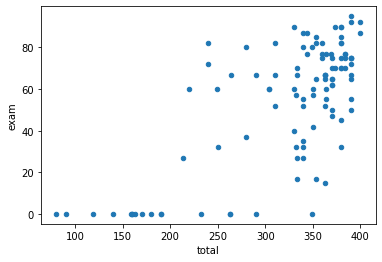

In [ ]:
dx10=dt2.head(107)
dx10["total"]=dx10["NO.1"]+dx10["NO.5"]+dx10["reportA"]+dx10["reportB"]
print(dx10.head(3))
dx10.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data27,data28を説明変数、目的変数に分割
model10=LinearRegression()
i=0 
stotal36=0
for i in range(10):
    xtrain10,xtest10,ytrain10,ytest10=train_test_split(data27,data28,test_size=0.2,random_state=i)
    model10.fit(xtrain10,ytrain10)
    sval36=model10.score(xtest10, ytest10)
    stotal36=stotal36+sval36
    saverage37=stotal36/10
print(saverage37)

0.4196831802020135


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain10,xtest10,ytrain10,ytest10=train_test_split(data27,data28,test_size=0.2,random_state=i)
    model10.fit(xtrain10,ytrain10)
    print(model10.coef_)
    print(model10.intercept_) #切片

[[0.33760038 0.25622827 0.1711391  0.3306421 ]]
[-32.68108894]
[[0.23701257 0.33071718 0.17620949 0.36828748]]
[-36.08143667]
[[0.33753811 0.24103259 0.15351166 0.23505577]]
[-23.33344798]
[[0.17269381 0.43176013 0.21065672 0.1322672 ]]
[-22.23910707]
[[0.31513292 0.2564323  0.18022316 0.2537924 ]]
[-26.58010167]
[[0.33260331 0.263651   0.20002306 0.09849824]]
[-20.7743535]
[[0.40418706 0.15135371 0.16421455 0.28252016]]
[-27.44456491]
[[0.37794895 0.19837612 0.17413739 0.25438108]]
[-27.67949201]
[[0.31244464 0.26354194 0.24578322 0.31380091]]
[-38.56353007]
[[0.30437227 0.28091148 0.20661023 0.08525758]]
[-17.1665197]


In [ ]:
#ロジスティック回帰
#正解率

logi10=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal37=0
stotal38=0
for i in range(10):
    xtrain010,xtest010,ytrain010,ytest010=train_test_split(data27,d_result,test_size=0.2,random_state=i)
    logi10.fit(xtrain010,ytrain010)

    sval37=logi10.score(xtrain010,ytrain010)
    sval38=logi10.score(xtest010,ytest010)
    
    stotal37=stotal37+sval37
    stotal38=stotal38+sval38

    saverage38=stotal37/10
    saverage39=stotal38/10
print(saverage38,saverage39)


0.6976470588235295 0.6909090909090909


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal39=0
for i in range(10):
    xtrain010,xtest010,ytrain010,ytest010=train_test_split(data27,d_result,test_size=0.2,random_state=i)
    ypred10 = logi10.predict(xtest010)
    sval39=accuracy_score(ytest010,ypred10)
    stotal39=stotal39+sval39
    saverage40=stotal39/10
print(saverage40)

0.7000000000000001


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest010,y_pred=ypred10))
i01=0
i10=0
for i in range(len(ytest010)):
  print(ytest010.iloc[i],ypred10[i])
  if ytest010.iloc[i]==0 and ypred10[i]==1:
    i01=+i01+1
  if ytest010.iloc[i]==1 and ypred10[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest10)}")

accuracy= 0.5909090909090909
1 1
1 1
0 1
1 1
1 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
i01=7,i10=4,total=22


In [ ]:
#6.1 外れ値を除外せずに欠損値に偏差値から求めた点数を代入して決定係数を求める

In [ ]:
dev2.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,81.308411,74.345794,77.514019,81.121495,77.140187,81.757009,77.289720,83.177570,54.177570,633.654206
std,24.287745,30.939412,25.776018,17.808049,19.582650,25.062880,34.683749,37.582566,29.395101,129.589344
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,124.000000
25%,77.500000,59.000000,68.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,579.500000
50%,90.000000,86.000000,77.000000,88.000000,80.000000,100.000000,100.000000,100.000000,65.000000,653.000000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,735.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
dt3=dev2[a2]

In [ ]:
data29=dev2[a1]
data30=dev2[a3]

   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    745
1   100   100   100    90    80   100      100      100    90    770
2   100    96   100    90    80   100      100      100    45    766


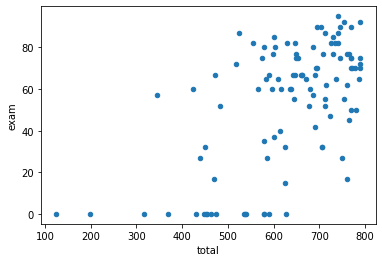

In [ ]:
dx11=dt3.head(107)
dx11["total"]=dx11["NO.1"]+dx11["NO.2"]+dx11["NO.3"]+dx11["NO.4"]+dx11["NO.5"]+dx11["NO.6"]+dx11["reportA"]+dx11["reportB"]
print(dx11.head(3))
dx11.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data29,data30を説明変数、目的変数に分割
model11=LinearRegression()
i=0 
stotal40=0
for i in range(10):
    xtrain11,xtest11,ytrain11,ytest11=train_test_split(data29,data30,test_size=0.2,random_state=i)
    model11.fit(xtrain11,ytrain11)
    sval40=model11.score(xtest11, ytest11)
    stotal40=stotal40+sval40
    saverage41=stotal40/10
print(saverage41)

0.370148896331793


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain11,xtest11,ytrain11,ytest11=train_test_split(data29,data30,test_size=0.2,random_state=i)
    model11.fit(xtrain11,ytrain11)
    print(model11.coef_)
    print(model11.intercept_) #切片

[[ 0.12645949  0.14272071  0.10820868 -0.06176849  0.21972224 -0.034878
   0.21767689  0.36080744]]
[-29.80615973]
[[ 0.0169855   0.11033309  0.08699021 -0.06079656  0.32623267  0.02669971
   0.29227343  0.24912086]]
[-28.57665227]
[[ 0.12688972  0.09756073  0.11955207 -0.1260508   0.14857893 -0.01504725
   0.21201939  0.3502806 ]]
[-17.51056967]
[[ 0.11696524 -0.03319353  0.02956151  0.07270021  0.06509308  0.15060405
   0.41069643  0.19748223]]
[-27.14752341]
[[ 0.10502022  0.10995197  0.18679758 -0.10409941  0.20643028  0.02043713
   0.23414446  0.34155493]]
[-33.17957588]
[[ 0.13756763  0.03505956  0.04418745 -0.03151471  0.01221315  0.15712743
   0.22136193  0.34437257]]
[-22.20708369]
[[ 0.09959588  0.0993215   0.07281411 -0.0995087   0.24463613 -0.00253056
   0.15323991  0.40374313]]
[-23.47863105]
[[ 0.14039915  0.06991778  0.11427357 -0.0259539   0.22459679 -0.01194455
   0.16436921  0.40739322]]
[-32.60105815]
[[ 0.13368718  0.13861836  0.06860544 -0.10544125  0.26246771 -0.0

In [ ]:
#ロジスティック回帰
#正解率

logi11=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal41=0
stotal42=0
for i in range(10):
    xtrain011,xtest011,ytrain011,ytest011=train_test_split(data29,d_result,test_size=0.2,random_state=i)
    logi11.fit(xtrain011,ytrain011)

    sval41=logi11.score(xtrain011,ytrain011)
    sval42=logi11.score(xtest011,ytest011)
    
    stotal41=stotal41+sval41
    stotal42=stotal42+sval42

    saverage42=stotal41/10
    saverage43=stotal42/10
print(saverage42,saverage43)


0.723529411764706 0.7090909090909092


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal43=0
for i in range(10):
    xtrain011,xtest011,ytrain011,ytest011=train_test_split(data29,d_result,test_size=0.2,random_state=i)
    ypred11= logi11.predict(xtest011)
    sval43=accuracy_score(ytest011,ypred11)
    stotal43=stotal43+sval43
    saverage44=stotal43/10
print(saverage44)

0.7227272727272728


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest011,y_pred=ypred11))
i01=0
i10=0
for i in range(len(ytest011)):
  print(ytest011.iloc[i],ypred11[i])
  if ytest011.iloc[i]==0 and ypred11[i]==1:
    i01=+i01+1 
  if ytest011.iloc[i]==1 and ypred11[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest11)}")

accuracy= 0.6363636363636364
1 1
1 1
0 1
1 1
1 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
i01=7,i10=2,total=22


In [ ]:
#6.2 相関係数で絞り込みver

In [ ]:
dev2.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
0,100,100,75,90,80,100,100,100,90,745
1,100,100,100,90,80,100,100,100,90,770
2,100,96,100,90,80,100,100,100,45,766
3,80,86,85,90,100,75,70,100,57,686
4,90,100,100,90,100,100,100,100,50,780


In [ ]:
dev02_cor=dev2.corr()['exam']

abs_dev02=dev02_cor.map(abs)
abs_dev02.sort_values(ascending=False)

exam       1.000000
reportB    0.631237
reportA    0.607673
total      0.598330
NO.5       0.333895
NO.1       0.304345
NO.6       0.234293
NO.2       0.202985
NO.3       0.163248
NO.4       0.137394
Name: exam, dtype: float64

In [ ]:
col6=['reportB','reportA','NO.5','NO.1']
data31=dev2[col6]
data32=dev2[a3]

   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    380
1   100   100   100    90    80   100      100      100    90    380
2   100    96   100    90    80   100      100      100    45    380


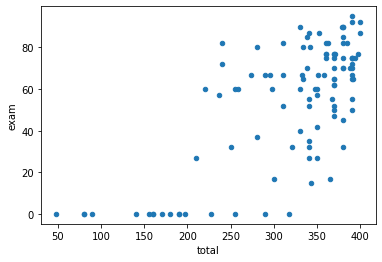

In [ ]:
dx12=dt3.head(107)
dx12["total"]=dx12["NO.1"]+dx12["NO.5"]+dx12["reportA"]+dx12["reportB"]
print(dx12.head(3))
dx12.plot(kind='scatter',x='total',y='exam')

In [ ]:
#data31,data32を説明変数、目的変数に分割
model12=LinearRegression()
i=0 
stotal44=0
for i in range(10):
    xtrain12,xtest12,ytrain12,ytest12=train_test_split(data31,data32,test_size=0.2,random_state=i)
    model12.fit(xtrain12,ytrain12)
    sval44=model12.score(xtest12, ytest12)
    stotal44=stotal44+sval44
    saverage45=stotal44/10
print(saverage45)

0.43404525871090127


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain12,xtest12,ytrain12,ytest12=train_test_split(data31,data32,test_size=0.2,random_state=i)
    model12.fit(xtrain12,ytrain12)
    print(model12.coef_)
    print(model10.intercept_) #切片

[[0.33549122 0.23201749 0.31688819 0.16596815]]
[-17.1665197]
[[0.23328707 0.30196466 0.39999283 0.09521368]]
[-17.1665197]
[[0.33539005 0.21800394 0.22514345 0.15195111]]
[-17.1665197]
[[0.18345702 0.41098139 0.14126422 0.17561675]]
[-17.1665197]
[[0.31552012 0.24579232 0.31868154 0.16501164]]
[-17.1665197]
[[0.33549773 0.23516312 0.12872843 0.19093302]]
[-17.1665197]
[[0.39442272 0.15100493 0.31663623 0.12162666]]
[-17.1665197]
[[0.38704381 0.1760253  0.30502923 0.16901526]]
[-17.1665197]
[[0.30484553 0.23361641 0.32429548 0.15851431]]
[-17.1665197]
[[0.30925923 0.27207922 0.13949276 0.20237447]]
[-17.1665197]


In [ ]:
#ロジスティック回帰
#正解率

logi12=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal45=0
stotal46=0
for i in range(10):
    xtrain012,xtest012,ytrain012,ytest012=train_test_split(data31,d_result,test_size=0.2,random_state=i)
    logi12.fit(xtrain012,ytrain012)

    sval45=logi12.score(xtrain012,ytrain012)
    sval46=logi12.score(xtest012,ytest012)
    
    stotal45=stotal45+sval45
    stotal46=stotal46+sval46

    saverage46=stotal45/10
    saverage47=stotal46/10
print(saverage46,saverage47)


0.7058823529411765 0.6954545454545454


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal47=0
for i in range(10):
    xtrain012,xtest012,ytrain012,ytest012=train_test_split(data31,d_result,test_size=0.2,random_state=i)
    ypred12 = logi12.predict(xtest012)
    sval47=accuracy_score(ytest012,ypred12)
    stotal47=stotal47+sval47
    saverage48=stotal47/10
print(saverage48)

0.7181818181818181


In [ ]:
print('accuracy=',accuracy_score(y_true=ytest012,y_pred=ypred12))
i01=0
i10=0
for i in range(len(ytest012)):
  print(ytest012.iloc[i],ypred12[i])
  if ytest012.iloc[i]==0 and ypred12[i]==1:
    i01=+i01+1 
  if ytest012.iloc[i]==1 and ypred12[i]==0:
    i10=+i01+1
print(f"i01={i01},i10={i10},total={len(ytest12)}")

accuracy= 0.5909090909090909
1 1
1 1
0 1
1 1
1 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
0 1
0 1
0 1
1 1
i01=7,i10=4,total=22


In [ ]:
#7.1 外れ値を指定して除外して欠損値に0を代入して決定係数を求める

In [ ]:
total.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,72.000000,58.000000,89.000000,88.000000,87.000000,91.000000,107.000000,107.000000,107.000000,107.000000
mean,83.472222,79.310345,79.775281,82.272727,79.310345,83.791209,77.289720,83.177570,54.177570,529.392523
std,25.351596,33.158951,26.078009,17.858143,19.216823,24.544072,34.683749,37.582566,29.395101,166.578655
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,80.000000,75.000000,75.000000,70.000000,70.000000,75.000000,70.000000,100.000000,33.500000,447.500000
50%,90.000000,100.000000,100.000000,90.000000,80.000000,100.000000,100.000000,100.000000,65.000000,550.000000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,76.000000,650.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


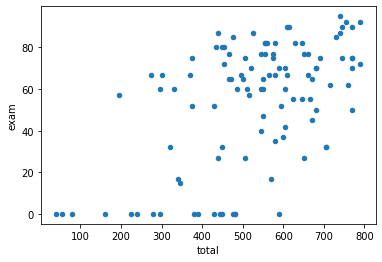

In [ ]:
total.plot(kind='scatter',x='total',y='exam')

In [ ]:
total1=total.fillna(0)
out_line1=total1[(total1['total']>370)&(total1['exam']<30)].index
print(out_line1)

Int64Index([6, 40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105], dtype='int64')


In [ ]:
total2=total1.drop([6, 40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105],axis=0)

In [ ]:

total2.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,55.212766,42.819149,65.159574,65.851064,63.617021,69.148936,83.510638,90.425532,60.627660,535.744681
std,44.618544,46.319127,38.489296,35.207818,36.569306,38.175023,28.158822,29.581849,24.901088,174.633191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,31.250000,52.500000,50.000000,50.000000,70.000000,100.000000,52.000000,451.250000
50%,80.000000,12.500000,75.000000,80.000000,80.000000,87.500000,100.000000,100.000000,67.000000,557.500000
75%,90.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,77.000000,663.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
out_line2=total2[(total2['total']<370)&(total2['exam']>60)].index
print(out_line2)

Int64Index([14, 46], dtype='int64')


In [ ]:
total3=total2.drop([14, 46],axis=0)

In [ ]:
total3.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,56.413043,42.934783,66.032609,66.739130,65.000000,70.652174,83.152174,90.217391,60.489130,541.141304
std,44.340875,46.487338,38.262670,34.865793,35.718681,37.175094,28.359131,29.870720,25.155121,172.568036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,43.750000,60.000000,50.000000,50.000000,70.000000,100.000000,52.000000,455.000000
50%,85.000000,12.500000,75.000000,80.000000,80.000000,100.000000,100.000000,100.000000,67.000000,562.500000
75%,90.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,77.000000,666.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


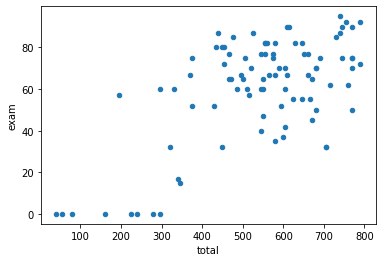

In [ ]:
total3.plot(kind='scatter',x='total',y='exam')

In [ ]:
total3.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,745
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,770
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45,670
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57,515
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50,680


In [ ]:
total4=total3[a1]
total5=total3[a3]

In [ ]:
total4.head(10)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100
5,0.0,50.0,75.0,70.0,0.0,100.0,100,100
7,0.0,100.0,100.0,0.0,0.0,100.0,100,100
8,100.0,100.0,75.0,80.0,90.0,100.0,100,100
9,0.0,0.0,0.0,100.0,0.0,25.0,100,0
10,0.0,0.0,50.0,0.0,80.0,0.0,100,100


In [ ]:
dt5=total3[a2]
dt5

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57
4,90.0,0.0,100.0,90.0,100.0,100.0,100,100,50
...,...,...,...,...,...,...,...,...,...
101,10.0,0.0,100.0,50.0,70.0,50.0,70,100,32
102,100.0,0.0,100.0,90.0,60.0,100.0,100,100,77
103,100.0,75.0,0.0,70.0,80.0,50.0,100,100,75
104,90.0,0.0,100.0,90.0,50.0,50.0,100,100,35


    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100    90  745.0
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100    90  770.0
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100    45  670.0


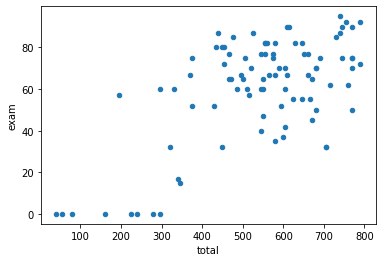

In [ ]:
dt5=total3[a2]
dx13=dt5.head(107)
dx13["total"]=dx13["NO.1"]+dx13["NO.2"]+dx13["NO.3"]+dx13["NO.4"]+dx13["NO.5"]+dx13["NO.6"]+dx13["reportA"]+dx13["reportB"]
print(dx13.head(3))
dx13.plot(kind='scatter',x='total',y='exam')

In [ ]:
#total4,total5を説明変数、目的変数に分割
model13=LinearRegression()
i=0 
stotal48=0
for i in range(10):
    xtrain13,xtest13,ytrain13,ytest13=train_test_split(total4,total5,test_size=0.2,random_state=i)
    model13.fit(xtrain13,ytrain13)
    sval48=model13.score(xtest13,ytest13)
    stotal48=stotal48+sval48
    saverage49=stotal48/10
print(saverage49)

0.1955196093892184


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain13,xtest13,ytrain13,ytest13=train_test_split(total4,total5,test_size=0.2,random_state=i)
    model13.fit(xtrain13,ytrain13)
    print(model13.coef_)
    print(model13.intercept_) #切片 

[[ 0.02415338 -0.00205127  0.01490176  0.01748724  0.0763577   0.22212182
   0.2767884   0.12814244]]
[1.3276386]
[[0.10160937 0.07783319 0.01324181 0.04463335 0.09081456 0.17921498
  0.14197082 0.21551999]]
[-1.68305354]
[[0.02729692 0.02683839 0.04075204 0.08011848 0.06350465 0.13523222
  0.15516115 0.25665929]]
[0.80699127]
[[ 0.07591104  0.05295551  0.02985208 -0.00539161  0.11407878  0.19698208
   0.13181311  0.23549662]]
[-1.33139493]
[[ 0.0931906   0.0330056   0.0942033  -0.0431048   0.15132543  0.19003499
   0.07163347  0.20831101]]
[1.84744155]
[[ 0.06669689  0.00304421  0.03234819 -0.03563496  0.11169801  0.17331475
   0.17646422  0.26391736]]
[0.34101379]
[[0.05986872 0.01737814 0.06608227 0.04868509 0.11494659 0.18904384
  0.08112955 0.21823966]]
[1.19842492]
[[ 0.05758229  0.02594389  0.07358892 -0.03171521  0.13680244  0.2174278
   0.14256412  0.19464679]]
[-0.04936682]
[[-0.00602608 -0.00699362  0.07096136  0.06909031  0.08803201  0.10331179
   0.15267385  0.25036014]]
[

In [ ]:
d003=d_result.drop([6, 14, 46,40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105],axis=0)

In [ ]:
print(total4.sum)
print(d003.sum)

<bound method DataFrame.sum of       NO.1   NO.2   NO.3  NO.4   NO.5   NO.6  reportA  reportB
0    100.0  100.0   75.0  90.0   80.0  100.0      100      100
1    100.0  100.0  100.0  90.0   80.0  100.0      100      100
2    100.0    0.0  100.0  90.0   80.0  100.0      100      100
3     80.0    0.0    0.0  90.0  100.0   75.0       70      100
4     90.0    0.0  100.0  90.0  100.0  100.0      100      100
..     ...    ...    ...   ...    ...    ...      ...      ...
101   10.0    0.0  100.0  50.0   70.0   50.0       70      100
102  100.0    0.0  100.0  90.0   60.0  100.0      100      100
103  100.0   75.0    0.0  70.0   80.0   50.0      100      100
104   90.0    0.0  100.0  90.0   50.0   50.0      100      100
106   90.0  100.0  100.0  90.0   80.0  100.0      100      100

[92 rows x 8 columns]>
<bound method Series.sum of 0      1
1      1
2      0
3      0
4      0
      ..
101    0
102    1
103    1
104    0
106    1
Name: result, Length: 92, dtype: uint8>


In [ ]:
#ロジスティック回帰
#正解率

logi13=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal49=0
stotal50=0
for i in range(10):
    xtrain013,xtest013,ytrain013,ytest013=train_test_split(total4,d003,test_size=0.2,random_state=i)
    logi13.fit(xtrain013,ytrain013)

    sval49=logi13.score(xtrain013,ytrain013)
    sval50=logi13.score(xtest013,ytest013)
    
    stotal49=stotal49+sval49
    stotal50=stotal50+sval50

    saverage50=stotal49/10
    saverage51=stotal50/10
print(saverage50,saverage51)


0.7726027397260273 0.6473684210526316


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal51=0
for i in range(10):
    xtrain013,xtest013,ytrain013,ytest013=train_test_split(total4,d003,test_size=0.2,random_state=i)
    ypred13 = logi13.predict(xtest013)
    sval51=accuracy_score(ytest013,ypred13)
    stotal51=stotal51+sval51
    saverage52=stotal51/10
print(saverage52)

0.6789473684210525


In [ ]:
#7.2 相関係数で絞り込みver

In [ ]:
total3.head(4)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
0,100.0,100.0,75.0,90.0,80.0,100.0,100,100,90,745
1,100.0,100.0,100.0,90.0,80.0,100.0,100,100,90,770
2,100.0,0.0,100.0,90.0,80.0,100.0,100,100,45,670
3,80.0,0.0,0.0,90.0,100.0,75.0,70,100,57,515


In [ ]:
total6=total3[a2]
total6.sum

<bound method DataFrame.sum of       NO.1   NO.2   NO.3  NO.4   NO.5   NO.6  reportA  reportB  exam
0    100.0  100.0   75.0  90.0   80.0  100.0      100      100    90
1    100.0  100.0  100.0  90.0   80.0  100.0      100      100    90
2    100.0    0.0  100.0  90.0   80.0  100.0      100      100    45
3     80.0    0.0    0.0  90.0  100.0   75.0       70      100    57
4     90.0    0.0  100.0  90.0  100.0  100.0      100      100    50
..     ...    ...    ...   ...    ...    ...      ...      ...   ...
101   10.0    0.0  100.0  50.0   70.0   50.0       70      100    32
102  100.0    0.0  100.0  90.0   60.0  100.0      100      100    77
103  100.0   75.0    0.0  70.0   80.0   50.0      100      100    75
104   90.0    0.0  100.0  90.0   50.0   50.0      100      100    35
106   90.0  100.0  100.0  90.0   80.0  100.0      100      100    62

[92 rows x 9 columns]>

In [ ]:
total6_cor=total6.corr()['exam']

abs_total6=total6_cor.map(abs)
abs_total6.sort_values(ascending=False)

exam       1.000000
NO.6       0.516118
reportB    0.490515
NO.5       0.476676
reportA    0.461173
NO.3       0.331993
NO.2       0.304872
NO.1       0.263656
NO.4       0.228497
Name: exam, dtype: float64

In [ ]:
col7=['NO.6','reportB','NO.5','reportA']
total7=total6[col7]
total8=total6[a3]

    NO.1   NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.0   75.0  90.0  80.0  100.0      100      100    90  380.0
1  100.0  100.0  100.0  90.0  80.0  100.0      100      100    90  380.0
2  100.0    0.0  100.0  90.0  80.0  100.0      100      100    45  380.0


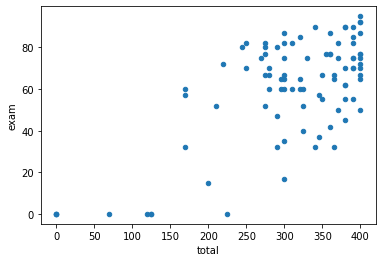

In [ ]:
dx14=dt5.head(107)
dx14["total"]=dx14["NO.5"]+dx14["NO.6"]+dx14["reportA"]+dx14["reportB"]
print(dx14.head(3))
dx14.plot(kind='scatter',x='total',y='exam')

In [ ]:
#total7,total8を説明変数、目的変数に分割
model14=LinearRegression()
i=0 
stotal52=0
for i in range(10):
    xtrain14,xtest14,ytrain14,ytest14=train_test_split(total7,total8,test_size=0.2,random_state=i)
    model14.fit(xtrain14,ytrain14)
    sval52=model14.score(xtest14, ytest14)
    stotal52=stotal52+sval52
    saverage53=stotal52/10
print(saverage53)

0.2786330650652326


In [ ]:
#ロジスティック回帰
#正解率

logi14=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal53=0
stotal54=0
for i in range(10):
    xtrain014,xtest014,ytrain014,ytest014=train_test_split(total7,d003,test_size=0.2,random_state=i)

    logi14.fit(xtrain014,ytrain014)

    sval53=logi14.score(xtrain014,ytrain014)
    sval54=logi14.score(xtest014,ytest014)
    
    stotal53=stotal53+sval53
    stotal54=stotal54+sval54

    saverage54=stotal53/10
    saverage55=stotal54/10
print(saverage54,saverage55)


0.758904109589041 0.7


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal55=0
for i in range(10):
    xtrain014,xtest014,ytrain014,ytest014=train_test_split(total7,d003,test_size=0.2,random_state=i)
    ypred14 = logi14.predict(xtest014)
    sval55=accuracy_score(ytest014,ypred14)
    stotal55=stotal55+sval55
    saverage56=stotal55/10
print(saverage56)

0.6894736842105262


In [ ]:
#8.1 外れ値を指定して除外して欠損値に平均を代入して決定係数を求める

In [ ]:
d0_mean= d0.mean()#各列の平均
data12=d0[d0['exam']!=0].fillna(d0_mean)
data12.sum

<bound method DataFrame.sum of       NO.1        NO.2        NO.3  NO.4  ...  reportB  exam  result  deviation
0    100.0  100.000000   75.000000  90.0  ...      100    90       〇       53.6
1    100.0  100.000000  100.000000  90.0  ...      100    90       〇       55.2
2    100.0   79.310345  100.000000  90.0  ...      100    45       ×       55.0
3     80.0   79.310345   79.775281  90.0  ...      100    57       ×       52.0
4     90.0   79.310345  100.000000  90.0  ...      100    50       ×       56.3
..     ...         ...         ...   ...  ...      ...   ...     ...        ...
102  100.0    0.000000  100.000000  90.0  ...      100    77       〇       52.7
103  100.0   75.000000    0.000000  70.0  ...      100    75       〇       46.5
104   90.0    0.000000  100.000000  90.0  ...      100    35       ×       46.3
105   70.0    0.000000    0.000000   0.0  ...      100    27       ×       53.3
106   90.0  100.000000  100.000000  90.0  ...      100    62       〇       54.5

[90 rows

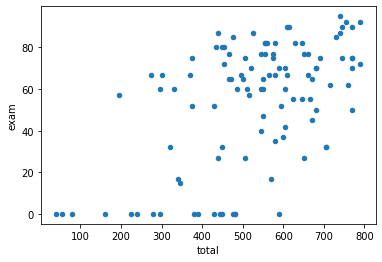

In [ ]:
total_ave=total.mean()
total9=total.fillna(total_ave)
total9.plot(kind='scatter',x='total',y='exam')

In [ ]:
out_line4=total9[(total9['total']>370)&(total1['exam']<30)].index
print(out_line4)

Int64Index([6, 40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105], dtype='int64')


In [ ]:
total10=total9.drop([6, 40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105],axis=0)
total10.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,83.628842,79.099413,79.587019,81.605416,80.491563,82.519874,83.510638,90.425532,60.627660,535.744681
std,20.012889,24.145440,23.107934,14.199312,15.235357,23.237604,28.158822,29.581849,24.901088,174.633191
min,10.000000,0.000000,0.000000,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,83.472222,79.310345,75.000000,80.000000,79.310345,75.000000,70.000000,100.000000,52.000000,451.250000
50%,83.472222,79.310345,79.775281,82.272727,80.000000,91.895604,100.000000,100.000000,67.000000,557.500000
75%,90.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,77.000000,663.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
out_line5=total10[(total10['total']<400)&(total10['exam']>60)].index
print(out_line5)

Int64Index([14, 41, 46, 63], dtype='int64')


In [ ]:
total11=total10.drop([14, 41, 46, 63],axis=0)
total11.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,83.635802,80.019157,79.962547,81.848485,80.306513,83.214286,83.888889,90.000000,60.255556,544.888889
std,20.457647,23.191791,23.404271,14.092441,15.433841,21.995149,27.219228,30.168069,25.379174,172.613711
min,10.000000,0.000000,0.000000,30.000000,20.000000,25.000000,0.000000,0.000000,0.000000,40.000000
25%,83.472222,79.310345,75.000000,80.000000,79.310345,75.000000,70.000000,100.000000,52.000000,465.000000
50%,90.000000,79.310345,79.775281,82.272727,80.000000,100.000000,100.000000,100.000000,67.000000,570.000000
75%,90.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,77.000000,668.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
dt6=total11[a2]
dt6

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100.0,100.000000,75.000000,90.0,80.0,100.0,100,100,90
1,100.0,100.000000,100.000000,90.0,80.0,100.0,100,100,90
2,100.0,79.310345,100.000000,90.0,80.0,100.0,100,100,45
3,80.0,79.310345,79.775281,90.0,100.0,75.0,70,100,57
4,90.0,79.310345,100.000000,90.0,100.0,100.0,100,100,50
...,...,...,...,...,...,...,...,...,...
101,10.0,0.000000,100.000000,50.0,70.0,50.0,70,100,32
102,100.0,0.000000,100.000000,90.0,60.0,100.0,100,100,77
103,100.0,75.000000,0.000000,70.0,80.0,50.0,100,100,75
104,90.0,0.000000,100.000000,90.0,50.0,50.0,100,100,35


    NO.1        NO.2   NO.3  NO.4  ...  reportA  reportB  exam       total
0  100.0  100.000000   75.0  90.0  ...      100      100    90  745.000000
1  100.0  100.000000  100.0  90.0  ...      100      100    90  770.000000
2  100.0   79.310345  100.0  90.0  ...      100      100    45  749.310345

[3 rows x 10 columns]


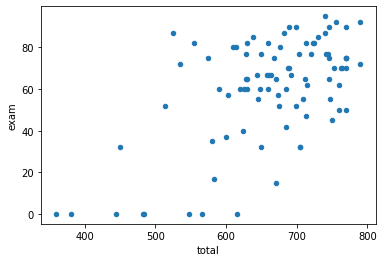

In [ ]:
dx15=dt6.head(107)
dx15["total"]=dx15["NO.1"]+dx15["NO.2"]+dx15["NO.3"]+dx15["NO.4"]+dx15["NO.5"]+dx15["NO.6"]+dx15["reportA"]+dx15["reportB"]
print(dx15.head(3))
dx15.plot(kind='scatter',x='total',y='exam')

In [ ]:
total12=total11[a1]
total13=total11[a3]
total14=total11[a2]

In [ ]:
#total12,total13を説明変数、目的変数に分割
model15=LinearRegression()
i=0 
stotal56=0
for i in range(10):
    xtrain15,xtest15,ytrain15,ytest15=train_test_split(total12,total13,test_size=0.2,random_state=i)
    model15.fit(xtrain15,ytrain15)
    sval56=model1.score(xtest15, ytest15)
    stotal56=stotal56+sval56
    saverage57=stotal56/10
print(saverage57)

0.2814554239055617


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain15,xtest15,ytrain15,ytest15=train_test_split(total12,total13,test_size=0.2,random_state=i)
    model15.fit(xtrain15,ytrain15)
    print(model15.coef_)

[[ 0.2575971   0.06671821  0.1220176  -0.07005791 -0.00487924  0.26368996
   0.16276545  0.25103588]]
[[ 0.25727612  0.04485561  0.13345284 -0.02011687 -0.02796101  0.35591941
   0.23337071  0.23277458]]
[[ 0.12143518  0.04803704  0.02453978  0.01794704 -0.00777762  0.34302869
   0.24681862  0.37806954]]
[[ 0.25263384 -0.00252306  0.1120593   0.04289668  0.00283778  0.25294208
   0.21403063  0.28967071]]
[[ 0.24156047  0.11973395  0.02643304 -0.12450716 -0.06530414  0.359622
   0.24673851  0.2164568 ]]
[[ 0.13857927  0.05956456  0.11846388 -0.06832923  0.07357279  0.28788493
   0.2049829   0.29473733]]
[[ 0.23335577  0.0774533   0.13945498 -0.18775308 -0.00420233  0.22521112
   0.18547959  0.31702864]]
[[ 0.24952543  0.02499156  0.23530056 -0.0442299  -0.09455573  0.29285098
   0.1326323   0.30507982]]
[[ 0.18972917 -0.07960415  0.11387997  0.03304409 -0.07577535  0.27397641
   0.2239283   0.28216577]]
[[ 0.17718753  0.17846513  0.06292473 -0.20622018 -0.00595639  0.26618034
   0.19451

In [ ]:
d004=d_result.drop([6, 40, 47, 62, 69, 70, 74, 79, 85, 87, 96, 98, 105,14, 41, 46, 63],axis=0)

In [ ]:
#ロジスティック回帰
#正解率

logi15=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal57=0
stotal58=0
for i in range(10):
    xtrain015,xtest015,ytrain015,ytest015=train_test_split(total12,d004,test_size=0.2,random_state=i)
    logi15.fit(xtrain015,ytrain015)

    sval57=logi15.score(xtrain015,ytrain015)
    sval58=logi15.score(xtest015,ytest015)
    
    stotal57=stotal57+sval57
    stotal58=stotal58+sval58

    saverage58=stotal57/10
    saverage59=stotal58/10
print(saverage58,saverage59)


0.7736111111111111 0.638888888888889


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal59=0
for i in range(10):
    xtrain015,xtest015,ytrain015,ytest015=train_test_split(total12,d004,test_size=0.2,random_state=i)
    ypred15 = logi15.predict(xtest015)
    sval59=accuracy_score(ytest015,ypred15)
    stotal59=stotal59+sval59
    saverage60=stotal59/10
print(saverage60)

0.7111111111111111


In [ ]:
#8.2 相関係数で絞り込みver

In [ ]:
total14_cor=total14.corr()['exam']

abs_total14=total14_cor.map(abs)
abs_total14.sort_values(ascending=False)

exam       1.000000
reportA    0.492028
reportB    0.489126
NO.6       0.386082
NO.1       0.328714
NO.4       0.218731
NO.5       0.150247
NO.3       0.142753
NO.2       0.088143
Name: exam, dtype: float64

In [ ]:
col8=['reportA','reportB','NO.6','NO.1']
total15=total14[col8]
total16=total14[a3]

    NO.1        NO.2   NO.3  NO.4  NO.5   NO.6  reportA  reportB  exam  total
0  100.0  100.000000   75.0  90.0  80.0  100.0      100      100    90  400.0
1  100.0  100.000000  100.0  90.0  80.0  100.0      100      100    90  400.0
2  100.0   79.310345  100.0  90.0  80.0  100.0      100      100    45  400.0


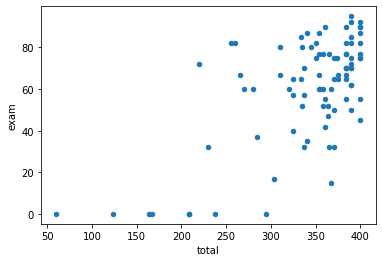

In [ ]:
dx16=dt6.head(107)
dx16["total"]=dx16["NO.1"]+dx16["NO.6"]+dx16["reportA"]+dx16["reportB"]
print(dx16.head(3))
dx16.plot(kind='scatter',x='total',y='exam')

In [ ]:
#total15,total16を説明変数、目的変数に分割
model16=LinearRegression()
i=0 
stotal60=0
for i in range(10):
    xtrain16,xtest16,ytrain16,ytest16=train_test_split(total15,total16,test_size=0.2,random_state=i)
    model16.fit(xtrain16,ytrain16)
    sval60=model16.score(xtest16, ytest16)
    stotal60=stotal60+sval60
    saverage61=stotal60/10
print(saverage61)

0.27010682362805793


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain16,xtest16,ytrain16,ytest16=train_test_split(total15,total16,test_size=0.2,random_state=i)
    model16.fit(xtrain16,ytrain16)
    print(model16.coef_)

[[0.16996199 0.23618424 0.29059922 0.23645517]]
[[0.27566885 0.20897512 0.3817009  0.22599165]]
[[0.25446522 0.37298615 0.36322811 0.12492313]]
[[0.23954605 0.28102239 0.29007236 0.22695753]]
[[0.23754202 0.2182428  0.36391444 0.21542793]]
[[0.23216523 0.27169091 0.33579374 0.10631748]]
[[0.20273695 0.30146394 0.26137224 0.17790154]]
[[0.16702621 0.29051071 0.30851468 0.20145503]]
[[0.24814944 0.2725678  0.27050001 0.19081493]]
[[0.18272118 0.31532171 0.3199595  0.16569632]]


In [ ]:
#ロジスティック回帰
#正解率

logi16=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal61=0
stotal62=0
for i in range(10):
    xtrain016,xtest016,ytrain016,ytest016=train_test_split(total15,d004,test_size=0.2,random_state=i)
    logi16.fit(xtrain016,ytrain016)

    sval61=logi16.score(xtrain016,ytrain016)
    sval62=logi16.score(xtest016,ytest016)
    
    stotal61=stotal61+sval61
    stotal62=stotal62+sval62

    saverage62=stotal61/10
    saverage63=stotal62/10
print(saverage62,saverage63)

0.7083333333333334 0.6833333333333332


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal63=0
for i in range(10):
    xtrain016,xtest016,ytrain016,ytest016=train_test_split(total15,d004,test_size=0.2,random_state=i)
    ypred16 = logi16.predict(xtest016)
    sval63=accuracy_score(ytest016,ypred16)
    stotal63=stotal63+sval63
    saverage64=stotal63/10
print(saverage63)

0.6833333333333332


In [ ]:
#9.1 外れ値を指定して除外して欠損値に偏差値から求めた点数を代入して決定係数を求める

In [ ]:
dev2.head(5)

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
0,100,100,75,90,80,100,100,100,90,745
1,100,100,100,90,80,100,100,100,90,770
2,100,96,100,90,80,100,100,100,45,766
3,80,86,85,90,100,75,70,100,57,686
4,90,100,100,90,100,100,100,100,50,780


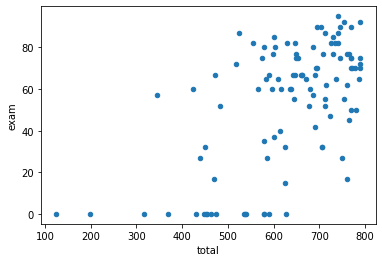

In [ ]:
dev2.plot(kind='scatter',x='total',y='exam')

In [ ]:
out_line6=dev2[(dev2['total']>400)&(dev2['exam']<40)].index
print(out_line6)

Int64Index([  6,   9,  18,  30,  31,  34,  38,  40,  43,  47,  61,  62,  69,
             70,  74,  76,  79,  84,  85,  87,  96,  98, 101, 104, 105],
           dtype='int64')


In [ ]:
total17=dev2.drop([6,   9,  18,  30,  31,  34,  38,  40,  43,  47,  61,  62,  69,70,  74,  76,  79,  84,  85,  87,  96,  98, 101, 104, 105],axis=0)
total17.describe()

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam,total
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,82.890244,75.109756,78.560976,81.243902,79.073171,82.317073,84.146341,92.682927,66.670732,656.024390
std,22.493898,29.597300,25.623146,15.462069,18.720017,25.256647,28.150882,26.201912,19.717170,129.745047
min,10.000000,0.000000,0.000000,30.000000,20.000000,0.000000,0.000000,0.000000,0.000000,124.000000
25%,80.000000,59.250000,75.000000,70.000000,70.000000,75.000000,70.000000,100.000000,60.000000,611.250000
50%,90.000000,85.500000,85.000000,83.000000,80.000000,100.000000,100.000000,100.000000,70.000000,689.000000
75%,100.000000,100.000000,100.000000,90.000000,90.000000,100.000000,100.000000,100.000000,79.250000,744.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,95.000000,790.000000


In [ ]:
total18=total17[a1]
total19=total17[a3]
total20=total17[a2]
total20

,NO.1,NO.2,NO.3,NO.4,NO.5,NO.6,reportA,reportB,exam
0,100,100,75,90,80,100,100,100,90
1,100,100,100,90,80,100,100,100,90
2,100,96,100,90,80,100,100,100,45
3,80,86,85,90,100,75,70,100,57
4,90,100,100,90,100,100,100,100,50
...,...,...,...,...,...,...,...,...,...
99,70,90,88,88,100,100,100,100,65
100,90,100,100,90,80,100,70,0,82
102,100,0,100,90,60,100,100,100,77
103,100,75,0,70,80,50,100,100,75


   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    745
1   100   100   100    90    80   100      100      100    90    770
2   100    96   100    90    80   100      100      100    45    766


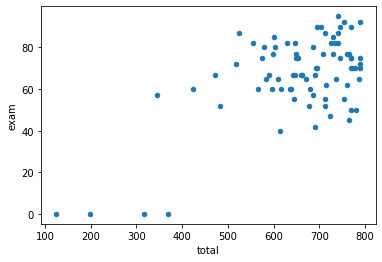

In [ ]:
dx17=total20.head(107)
dx17["total"]=dx17["NO.1"]+dx17["NO.2"]+dx17["NO.3"]+dx17["NO.4"]+dx17["NO.5"]+dx17["NO.6"]+dx17["reportA"]+dx17["reportB"]
print(dx17.head(3))
dx17.plot(kind='scatter',x='total',y='exam')

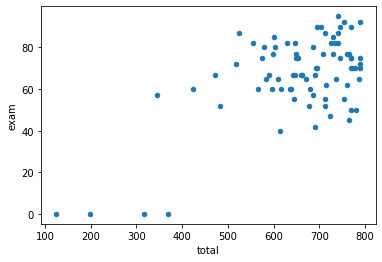

In [ ]:
total17.plot(kind='scatter',x='total',y='exam')

In [ ]:
#total18,total19を説明変数、目的変数に分割
model17=LinearRegression()
i=0 
stotal64=0
for i in range(10):
    xtrain17,xtest17,ytrain17,ytest17=train_test_split(total18,total19,test_size=0.2,random_state=56)
    model17.fit(xtrain17,ytrain17)
    sval64=model17.score(xtest17, ytest17)
    stotal64=stotal64+sval64
    saverage65=stotal64/10
print(saverage65)

-0.9418981192286988


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain17,xtest17,ytrain17,ytest17=train_test_split(total18,total19,test_size=0.2,random_state=i)
    model17.fit(xtrain17,ytrain17)
    print(model17.coef_)

[[ 0.16699743  0.02763488  0.0242996   0.04527328 -0.00577463  0.083835
   0.17287217  0.17046016]]
[[ 0.13135027 -0.00417371 -0.06348177  0.2958074   0.00131196  0.05657187
   0.17711045  0.12989007]]
[[ 0.13380908  0.02315274 -0.03411906  0.20252113  0.10477823  0.02640495
   0.18215366  0.1396542 ]]
[[ 0.12138128  0.04755421  0.00998916 -0.08864567 -0.00815379  0.08229869
   0.38793396  0.03960252]]
[[ 0.16397512  0.0339432  -0.08923648  0.04670379  0.13632193  0.03083429
   0.14234825  0.2329378 ]]
[[ 0.20535952  0.01678959  0.02960742 -0.01374043 -0.04149764  0.11113551
   0.27457397  0.09681174]]
[[ 0.24635626  0.04363334 -0.0245725   0.0108601  -0.12240933  0.07835023
   0.20877122  0.06427984]]
[[ 0.23154348  0.06365703  0.00672737  0.00137191 -0.09298976  0.11302177
   0.17840605  0.18354328]]
[[ 0.26295704  0.03502014 -0.02089824 -0.04943716 -0.10088168  0.21385688
   0.21653295  0.1135237 ]]
[[ 0.18846931  0.04277449  0.01766584 -0.00306652  0.01540367  0.05997868
   0.26791

In [ ]:
d005=d_result.drop([6,   9,  18,  30,  31,  34,  38,  40,  43,  47,  61,  62,  69,70,  74,  76,  79,  84,  85,  87,  96,  98, 101, 104, 105],axis=0)

In [ ]:
#ロジスティック回帰
#正解率

logi17=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal65=0
stotal66=0
for i in range(10):
    xtrain017,xtest017,ytrain017,ytest017=train_test_split(total18,d005,test_size=0.2,random_state=i)
    logi17.fit(xtrain017,ytrain017)

    sval65=logi17.score(xtrain017,ytrain017)
    sval66=logi17.score(xtest017,ytest017)
    
    stotal65=stotal65+sval65
    stotal66=stotal66+sval66

    saverage66=stotal65/10
    saverage67=stotal66/10
print(saverage66,saverage67)

0.8076923076923077 0.7705882352941178


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal67=0
for i in range(10):
    xtrain017,xtest017,ytrain017,ytest017=train_test_split(total18,d005,test_size=0.2,random_state=i)
    ypred17 = logi17.predict(xtest017)
    sval67=accuracy_score(ytest017,ypred17)
    stotal67=stotal67+sval67
    saverage68=stotal67/10
print(saverage68)

0.8117647058823529


In [ ]:
#9.2 相関係数で絞り込みver

In [ ]:
total20_cor=total20.corr()['exam']

abs_total20=total20_cor.map(abs)
abs_total20.sort_values(ascending=False)

exam       1.000000
reportA    0.583680
NO.1       0.515996
reportB    0.456485
NO.6       0.403612
NO.2       0.381661
NO.5       0.380264
NO.4       0.364885
NO.3       0.234031
Name: exam, dtype: float64

In [ ]:
col9=['reportA','NO.1','reportB','NO.6']
total21=total20[col9]
total22=total20[a3]

   NO.1  NO.2  NO.3  NO.4  NO.5  NO.6  reportA  reportB  exam  total
0   100   100    75    90    80   100      100      100    90    400
1   100   100   100    90    80   100      100      100    90    400
2   100    96   100    90    80   100      100      100    45    400


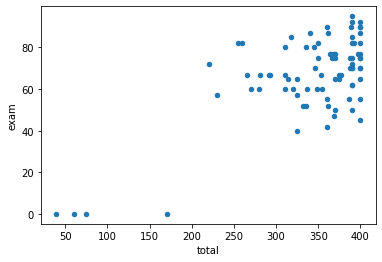

In [ ]:
dx18=total20.head(107)
dx18["total"]=dx18["NO.1"]+dx18["NO.6"]+dx18["reportA"]+dx18["reportB"]
print(dx18.head(3))
dx18.plot(kind='scatter',x='total',y='exam')

In [ ]:
#total21,total22を説明変数、目的変数に分割
model18=LinearRegression()
i=0 
stotal68=0

for i in range(10):
    xtrain18,xtest18,ytrain18,ytest18=train_test_split(total21,total22,test_size=0.2,random_state=i)
    model18.fit(xtrain18,ytrain18)
    sval68=model18.score(xtest18, ytest18)
    stotal68=stotal68+sval68
    saverage69=stotal68/10
print(saverage69)

0.4534187065154763


In [ ]:
#各カラムの特徴量
i=0 
for i in range(10):
    xtrain18,xtest18,ytrain18,ytest18=train_test_split(total21,total22,test_size=0.2,random_state=i)
    model18.fit(xtrain18,ytrain18)
    print(model18.coef_)

[[0.18024408 0.19134187 0.16946627 0.11874931]]
[[0.17395745 0.206634   0.14503956 0.10079426]]
[[0.18660425 0.21721126 0.14400445 0.09492906]]
[[0.39440423 0.12111346 0.03352245 0.08350612]]
[[0.164522   0.20692234 0.22940882 0.06636596]]
[[0.27538292 0.20150357 0.09304213 0.12008764]]
[[0.20369791 0.22690798 0.07992876 0.05917811]]
[[0.17326657 0.23521064 0.18720463 0.11987617]]
[[0.20854863 0.24673017 0.1190551  0.17771114]]
[[0.27519855 0.21141468 0.1269619  0.08873568]]


In [ ]:
#ロジスティック回帰
#正解率

logi18=LogisticRegression(random_state=0,C=0.1)
i=0 
stotal69=0
stotal70=0
for i in range(10):
    xtrain018,xtest018,ytrain018,ytest018=train_test_split(total21,d005,test_size=0.2,random_state=i)
    logi18.fit(xtrain018,ytrain018)

    sval69=logi18.score(xtrain018,ytrain018)
    sval70=logi18.score(xtest018,ytest018)
    
    stotal69=stotal69+sval69
    stotal70=stotal70+sval70

    saverage70=stotal69/10
    saverage71=stotal70/10
print(saverage70,saverage71)


0.8046153846153846 0.8117647058823529


In [ ]:
#予測 100回予測したうちの○○回は正解
i=0
stotal71=0
for i in range(10):
    xtrain018,xtest018,ytrain018,ytest018=train_test_split(total21,d005,test_size=0.2,random_state=i)
    ypred18= logi18.predict(xtest018)
    sval71=accuracy_score(ytest018,ypred18)
    stotal71=stotal71+sval71
    saverage72=stotal71/10
print(saverage72)

0.8352941176470589


In [ ]:
list=[
      [print(round(saverage1,3),round(saverage2,3),round(saverage3,3),round(saverage4,3))],
      [print(round(saverage5,3),round(saverage6,3),round(saverage7,3),round(saverage8,3))],
      [print(round(saverage9,3),round(saverage10,3),round(saverage11,3),round(saverage12,3))],
      [print(round(saverage13,3),round(saverage14,3),round(saverage15,3),round(saverage16,3))],
      [print(round(saverage17,3),round(saverage18,3),round(saverage19,3),round(saverage20,3))],
      [print(round(saverage21,3),round(saverage22,3),round(saverage23,3),round(saverage24,3))],
      [print(round(saverage25,3),round(saverage26,3),round(saverage27,3),round(saverage28,3))],
      [print(round(saverage29,3),round(saverage30,3),round(saverage31,3),round(saverage32,3))],
      [print(round(saverage33,3),round(saverage34,3),round(saverage35,3),round(saverage36,3))],
      [print(round(saverage37,3),round(saverage38,3),round(saverage39,3),round(saverage40,3))],
      [print(round(saverage41,3),round(saverage42,3),round(saverage43,3),round(saverage44,3))],
      [print(round(saverage45,3),round(saverage46,3),round(saverage47,3),round(saverage48,3))],
      [print(round(saverage49,3),round(saverage50,3),round(saverage51,3),round(saverage52,3))],
      [print(round(saverage53,3),round(saverage54,3),round(saverage55,3),round(saverage56,3))],
      [print(round(saverage57,3),round(saverage58,3),round(saverage59,3),round(saverage60,3))],
      [print(round(saverage61,3),round(saverage62,3),round(saverage63,3),round(saverage64,3))],
      [print(round(saverage65,3),round(saverage66,3),round(saverage67,3),round(saverage68,3))],
      [print(round(saverage69,3),round(saverage70,3),round(saverage71,3),round(saverage72,3))],

]


0.413 0.722 0.691 0.686
0.461 0.707 0.714 0.75
-0.264 0.708 0.65 0.65
-0.078 0.699 0.667 0.678
-0.303 0.721 0.65 0.733
-0.166 0.721 0.644 0.689
-0.351 0.717 0.628 0.661
-0.221 0.729 0.65 0.694
0.361 0.694 0.705 0.709
0.42 0.698 0.691 0.7
0.37 0.724 0.709 0.723
0.434 0.706 0.695 0.718
0.196 0.773 0.647 0.679
0.279 0.759 0.7 0.689
0.281 0.774 0.639 0.711
0.27 0.708 0.683 0.711
-0.942 0.808 0.771 0.812
0.453 0.805 0.812 0.835


In [ ]:
list=[
      [round(saverage1,3),round(saverage2,3),round(saverage3,3),round(saverage4,3)],
      [round(saverage5,3),round(saverage6,3),round(saverage7,3),round(saverage8,3)],
      [round(saverage9,3),round(saverage10,3),round(saverage11,3),round(saverage12,3)],
      [round(saverage13,3),round(saverage14,3),round(saverage15,3),round(saverage16,3)],
      [round(saverage17,3),round(saverage18,3),round(saverage19,3),round(saverage20,3)],
      [round(saverage21,3),round(saverage22,3),round(saverage23,3),round(saverage24,3)],
      [round(saverage25,3),round(saverage26,3),round(saverage27,3),round(saverage28,3)],
      [round(saverage29,3),round(saverage30,3),round(saverage31,3),round(saverage32,3)],
      [round(saverage33,3),round(saverage34,3),round(saverage35,3),round(saverage36,3)],
      [round(saverage37,3),round(saverage38,3),round(saverage39,3),round(saverage40,3)],
      [round(saverage41,3),round(saverage42,3),round(saverage43,3),round(saverage44,3)],
      [round(saverage45,3),round(saverage46,3),round(saverage47,3),round(saverage48,3)],
      [round(saverage49,3),round(saverage50,3),round(saverage51,3),round(saverage52,3)],
      [round(saverage53,3),round(saverage54,3),round(saverage55,3),round(saverage56,3)],
      [round(saverage57,3),round(saverage58,3),round(saverage59,3),round(saverage60,3)],
      [round(saverage61,3),round(saverage62,3),round(saverage63,3),round(saverage64,3)],
      [round(saverage65,3),round(saverage66,3),round(saverage67,3),round(saverage68,3)],
      [round(saverage69,3),round(saverage70,3),round(saverage71,3),round(saverage72,3)],

]
DATA=pd.DataFrame(list)
DATA

,0,1,2,3
0,0.413,0.722,0.691,0.686
1,0.461,0.707,0.714,0.750
2,-0.264,0.708,0.650,0.650
3,-0.078,0.699,0.667,0.678
4,-0.303,0.721,0.650,0.733
5,-0.166,0.721,0.644,0.689
6,-0.351,0.717,0.628,0.661
7,-0.221,0.729,0.650,0.694
8,0.361,0.694,0.705,0.709
9,0.420,0.698,0.691,0.700


In [ ]:
DATA.index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
DATA.columns=['決定係数','学習データの正解率','テストデータの正解率 ','予測']
DATA

,決定係数,学習データの正解率,テストデータの正解率,予測
1,0.413,0.722,0.691,0.686
2,0.461,0.707,0.714,0.750
3,-0.264,0.708,0.650,0.650
4,-0.078,0.699,0.667,0.678
5,-0.303,0.721,0.650,0.733
6,-0.166,0.721,0.644,0.689
7,-0.351,0.717,0.628,0.661
8,-0.221,0.729,0.650,0.694
9,0.361,0.694,0.705,0.709
10,0.420,0.698,0.691,0.700
